In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 97% 595M/612M [00:09<00:00, 69.6MB/s]
100% 612M/612M [00:09<00:00, 67.5MB/s]


In [ ]:
ls

drive/  gtsrb-german-traffic-sign.zip  sample_data/


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score
#import tensorflow as tf
from tensorflow.keras import *

In [ ]:
 pwd

'/content'

In [ ]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = '/content/train/'

for i in os.listdir(cur_path):
    print(i)
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
x_train = np.array(data)
x_train = x_train / 255
y_train = np.array(labels).astype(np.float)

18
17
23
24
7
32
42
22
40
12
13
37
30
6
10
34
35
38
15
9
8
3
27
4
19
14
29
41
39
33
11
36
2
21
1
20
26
31
0
25
5
16
28


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(31367, 30, 30, 3) (31367,)
(7842, 30, 30, 3) (7842,)


In [ ]:
classes_dict = { 0:'Speed limit (20km/h)',
                 1:'Speed limit (30km/h)', 
                 2:'Speed limit (50km/h)', 
                 3:'Speed limit (60km/h)', 
                 4:'Speed limit (70km/h)', 
                 5:'Speed limit (80km/h)', 
                 6:'End of speed limit (80km/h)', 
                 7:'Speed limit (100km/h)', 
                 8:'Speed limit (120km/h)', 
                 9:'No passing', 
                 10:'No passing veh over 3.5 tons', 
                 11:'Right-of-way at intersection', 
                 12:'Priority road', 
                 13:'Yield', 
                 14:'Stop', 
                 15:'No vehicles', 
                 16:'Veh > 3.5 tons prohibited', 
                 17:'No entry', 
                 18:'General caution', 
                 19:'Dangerous curve left', 
                 20:'Dangerous curve right', 
                 21:'Double curve', 
                 22:'Bumpy road', 
                 23:'Slippery road', 
                 24:'Road narrows on the right', 
                 25:'Road work', 
                 26:'Traffic signals', 
                 27:'Pedestrians', 
                 28:'Children crossing', 
                 29:'Bicycles crossing', 
                 30:'Beware of ice/snow',
                 31:'Wild animals crossing', 
                 32:'End speed + passing limits', 
                 33:'Turn right ahead', 
                 34:'Turn left ahead', 
                 35:'Ahead only', 
                 36:'Go straight or right', 
                 37:'Go straight or left', 
                 38:'Keep right', 
                 39:'Keep left', 
                 40:'Roundabout mandatory', 
                 41:'End of no passing', 
                 42:'End no passing veh > 3.5 tons' }

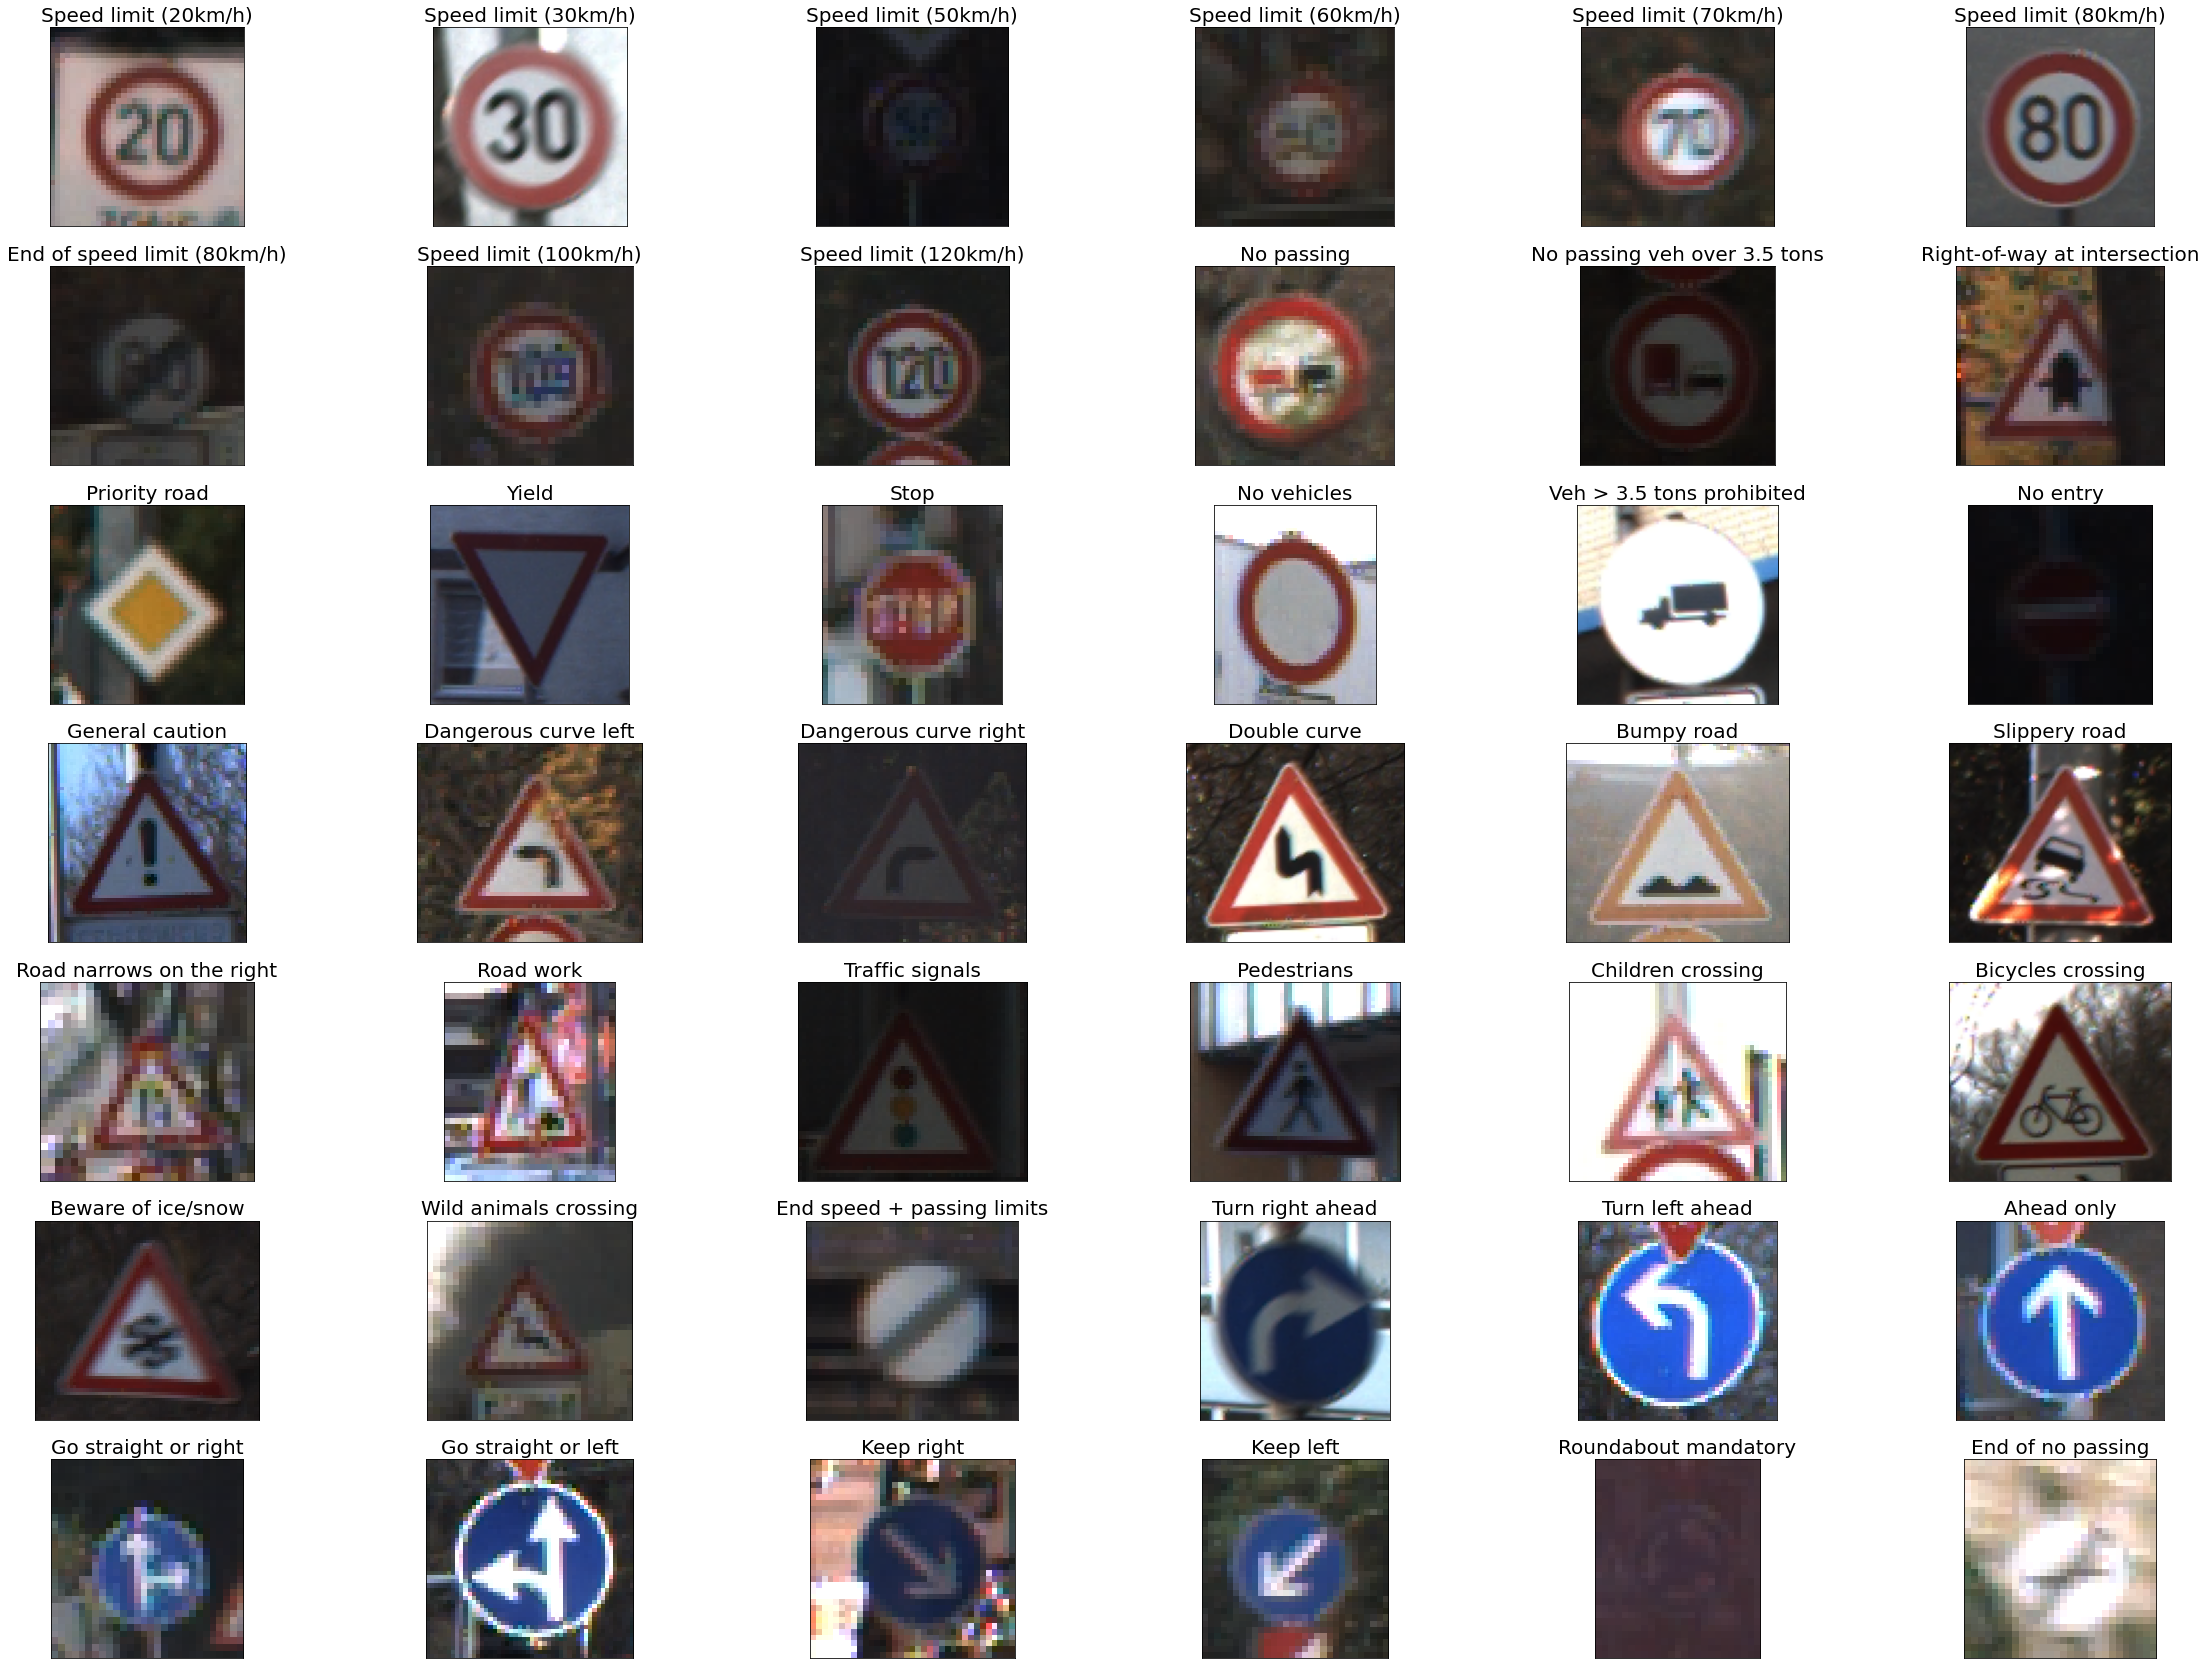

In [ ]:
from matplotlib.image import imread

rows, columns = 7, 6
dir_path = "/content/train" 
classes = len(os.listdir(dir_path))
    
fig, axes = plt.subplots(rows , columns, figsize=(40, 30))
k = 0
for row in range(rows):
    for column in range(columns):
        class_path = dir_path + '/' + str(k)
        image_path = class_path + '/' + str(os.listdir(class_path)[0])
        ax = axes[row, column]
        ax.set_title(classes_dict[k], loc='center', fontsize=20)
        ax.imshow(imread(image_path))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        k += 1
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 <a list of 43 Text major ticklabel objects>)

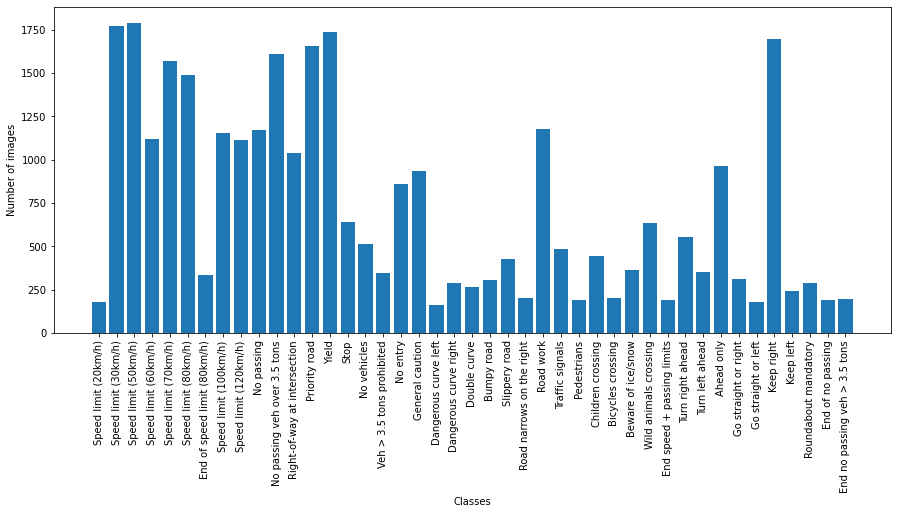

In [ ]:
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
#data_df.sort_values().plot(kind = 'bar')
plt.bar(list(classes_dict.values()), 
        pd.Series(y_train, name='Traffic sign class').value_counts().sort_index().values)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.xticks(rotation=90)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *


model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu', 
                 input_shape = (30, 30, 3), data_format = 'channels_last',
                 kernel_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())

# replace maxpooling with conv2d
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same", strides = (2, 2),
                kernel_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128, kernel_size = (5,5), activation = 'relu' ,
                 kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# replace maxpooling with conv2d
model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = "same",
                 kernel_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-3), strides = (2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax',  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)        

In [ ]:
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)
model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train ,y_train,  batch_size = 128, 
         epochs=20, validation_data = (x_valid, y_valid),
          callbacks=[callback, reduce_lr], shuffle = True)

Epoch 1/20
246/246 [==============================] - 300s 1s/step - loss: 9.3708 - accuracy: 0.6901 - val_loss: 8.4732 - val_accuracy: 0.1668
Epoch 2/20
246/246 [==============================] - 301s 1s/step - loss: 4.0535 - accuracy: 0.9008 - val_loss: 4.0456 - val_accuracy: 0.7026
Epoch 3/20
246/246 [==============================] - 302s 1s/step - loss: 2.5391 - accuracy: 0.9245 - val_loss: 2.4748 - val_accuracy: 0.8573
Epoch 4/20
246/246 [==============================] - 300s 1s/step - loss: 2.1268 - accuracy: 0.9282 - val_loss: 1.7898 - val_accuracy: 0.9480
Epoch 5/20
246/246 [==============================] - 301s 1s/step - loss: 1.7104 - accuracy: 0.9429 - val_loss: 1.6655 - val_accuracy: 0.9206
Epoch 6/20
246/246 [==============================] - 299s 1s/step - loss: 1.5590 - accuracy: 0.9443 - val_loss: 1.4680 - val_accuracy: 0.9679
Epoch 7/20
246/246 [==============================] - 298s 1s/step - loss: 1.4854 - accuracy: 0.9470 - val_loss: 1.3713 - val_accuracy: 0.9770

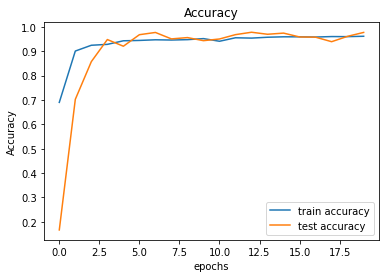

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label= 'train accuracy')
plt.plot(history.history['val_accuracy'], label= 'test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

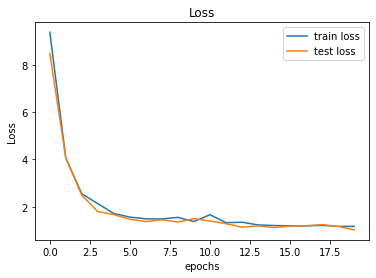

In [ ]:
plt.figure(0)
plt.plot(history.history['loss'], label= 'train loss')
plt.plot(history.history['val_loss'], label= 'test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.evaluate(x_valid, y_valid)

246/246 [==============================] - 19s 78ms/step - loss: 1.0172 - accuracy: 0.9772


[1.017223596572876, 0.9771741628646851]

In [ ]:
y_prediction=model.predict(x_valid)
y_pred_class=[np.argmax(element) for element in y_prediction]
y_pred_class[:5]

[2, 4, 3, 38, 4]

In [ ]:
arr=[]
for i in range(len(y_pred_class)):
  arr.append(classes_dict[y_pred_class[i]])
print(arr[0])

Speed limit (50km/h)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_valid,y_pred_class))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        32
         1.0       0.97      0.97      0.97       449
         2.0       0.94      1.00      0.97       459
         3.0       1.00      0.92      0.96       290
         4.0       0.98      0.98      0.98       409
         5.0       0.90      0.99      0.95       369
         6.0       0.99      1.00      0.99        85
         7.0       0.96      0.93      0.94       287
         8.0       1.00      0.90      0.94       298
         9.0       0.99      0.99      0.99       298
        10.0       1.00      0.99      0.99       403
        11.0       1.00      0.90      0.95       282
        12.0       1.00      1.00      1.00       443
        13.0       0.99      1.00      0.99       422
        14.0       1.00      1.00      1.00       141
        15.0       1.00      0.90      0.95       115
        16.0       0.96      1.00      0.98        74
        17.0       1.00    

In [ ]:

print(confusion_matrix(y_valid,y_pred_class))

[[ 29   2   0 ...   0   0   0]
 [  0 436   9 ...   0   0   0]
 [  0   0 458 ...   0   0   0]
 ...
 [  0   0   0 ...  72   0   0]
 [  0   0   0 ...   0  44   0]
 [  0   0   0 ...   0   0  41]]


In [ ]:
from sklearn.preprocessing import normalize
normed_matrix = normalize(confusion_matrix(y_valid,y_pred_class), axis=1, norm='l1')
print(normed_matrix)

[[0.90625    0.0625     0.         ... 0.         0.         0.        ]
 [0.         0.97104677 0.02004454 ... 0.         0.         0.        ]
 [0.         0.         0.99782135 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.95652174 0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
def plotter(X,y,index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(classes_dict[y[index]])

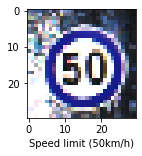

In [ ]:
plotter(x_valid,y_valid,0)

(1, 30, 30, 3)

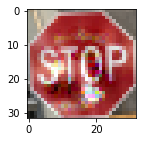

In [ ]:
from tensorflow.keras.preprocessing import image
trial1=cv2.imread('/content/drive/MyDrive/Kaggle/hehe.png')

trial1 = cv2.cvtColor(trial1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,2))
plt.imshow(trial1)
trial1=np.resize(trial1,(30,30,3))
trial1=np.array(trial1)/255
#trial1=image.img_to_array(trial1)
trial1 = np.expand_dims(trial1, axis=0)
#trial1[np.newaxis,:]
trial1.shape


In [ ]:
result=model.predict(trial1)
a=np.argmax(result)
print(a)
classes_dict[a]

40


'Roundabout mandatory'

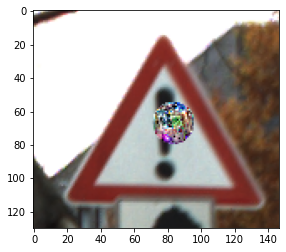

In [ ]:
import numpy as np 
import cv2

def patch_attack(original_img,patch,resize=False):
	"""
	Patch performs an advserial patch black box attack on a neural network
	"""
	#print("Initial shape:", original_img.shape) # (2308,3468,3) GIBBON
	# (1026,778,3) TOTORO

	h, w = original_img.shape[:2]
	size = min(h,w)
	size //= 5

	patch = cv2.resize(patch, dsize=(size, size), interpolation=cv2.INTER_CUBIC)
	#print("SIZES", patch.shape) # (662,838,4)

	x_offset = w - size - 50
	y_offset = h - size - 50

	y1, y2 = y_offset, y_offset + patch.shape[0]
	#print("y1, y2", y1, y2) #(50,712) # diff: 155
	x1, x2 = x_offset, x_offset + patch.shape[1]
	#print("x1, x2", x1, x2) #(50,888) # diff: 155

	assert patch.shape[2] == 4, "Make sure you use cv2.imread('patch.png',-1)"
	# alpha_s is a one-hot vector
	alpha_s = patch[:, :, 3] / 255.0
	alpha_l = 1.0 - alpha_s

	#print(original_img.shape)  #(1026,778,3)
	#print("A", patch[:,:,:].shape)  #(662, 838, 4)
	#print("B", original_img[y1:y2, x1:x2, :].shape)  #(662, 728, 3)

	for c in range(0, 3):
		original_img[y1:y2, x1:x2, c] = (alpha_s * patch[:, :, c] +
						alpha_l * original_img[y1:y2, x1:x2, c])

	# if resize != False : original_img = cv2.resize(original_img, resize)
	# x_pos = original_img[::-1].astype(np.float32)
	#print("Final shape:", original_img.shape)
	return original_img



original_img = cv2.imread('/content/test/00006.png')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
patch = cv2.imread('/content/drive/MyDrive/Kaggle/Patch.png',-1)
x_pos = patch_attack(original_img,patch)
plt.imshow(x_pos)

In [ ]:
x_pos=np.resize(x_pos,(30,30,3))
x_pos=np.array(x_pos)/255
x_pos = np.expand_dims(x_pos, axis=0)
result=model.predict(x_pos)
a=np.argmax(result)
print(a)
classes_dict[a]

13


'Yield'

In [ ]:

adversed_images=[]

for i in range (x_valid.shape[0]):

  patched_image=patch_attack(x_valid[i],patch)

  adversed_images.append(patched_image)

x_test = np.array(adversed_images)

x_test1 = x_test / 255


In [ ]:
y_prediction1=model.predict(x_test)
y_pred_class1=[np.argmax(element) for element in y_prediction1]

In [ ]:
model.evaluate(x_test, y_valid)

246/246 [==============================] - 19s 79ms/step - loss: 191.1352 - accuracy: 0.0565


[191.13519287109375, 0.056490689516067505]

In [ ]:
print(classification_report(y_valid,y_pred_class1))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        32
         1.0       0.00      0.00      0.00       449
         2.0       0.00      0.00      0.00       459
         3.0       0.00      0.00      0.00       290
         4.0       0.00      0.00      0.00       409
         5.0       0.00      0.00      0.00       369
         6.0       0.00      0.00      0.00        85
         7.0       0.00      0.00      0.00       287
         8.0       0.00      0.00      0.00       298
         9.0       0.00      0.00      0.00       298
        10.0       0.00      0.00      0.00       403
        11.0       0.00      0.00      0.00       282
        12.0       0.06      1.00      0.11       443
        13.0       0.00      0.00      0.00       422
        14.0       0.00      0.00      0.00       141
        15.0       0.00      0.00      0.00       115
        16.0       0.00      0.00      0.00        74
        17.0       0.00    

In [ ]:
print(confusion_matrix(y_valid,y_pred_class1))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:

normed_matrix = normalize(confusion_matrix(y_valid,y_pred_class1), axis=1, norm='l1')
print(normed_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
